In [ ]:
"""
Nelson Farrell
08-22-2024
Northeastern University

This file contains example usage of DBSCAN.
"""

### Import modules

In [1]:
from sklearn.datasets import make_blobs, make_moons
from dbscan_class import DBSCAN
import matplotlib.pyplot as plt

### Make some test data: globular

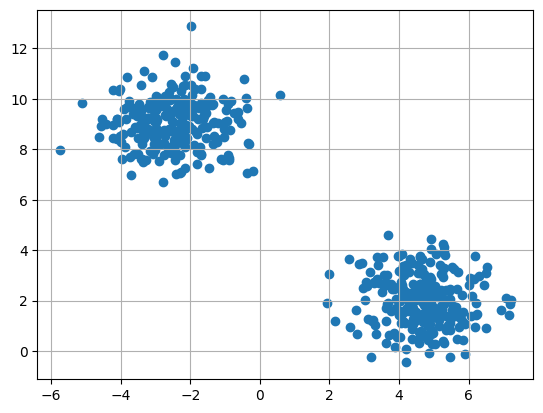

In [2]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 2, random_state = 42)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1]);

### Instantiate DBSCAN

In [3]:
model = DBSCAN(data = X)

### Find the best ```eps``` for various ```min_points``` values, i.e., $k$

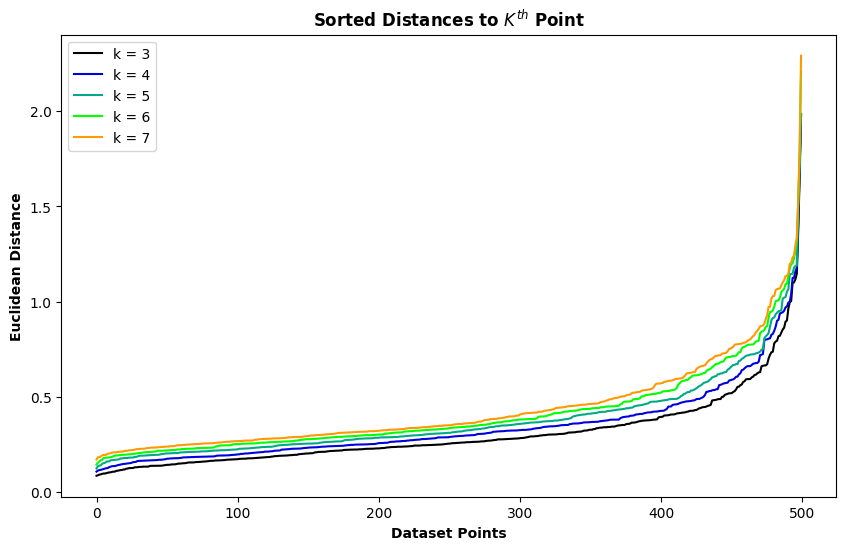

In [4]:
model.find_best_eps()

### Choose ```eps``` and ```min_points```; fit model

In [5]:
model.fit(eps = 1.25, min_points = 7)

### Plot results

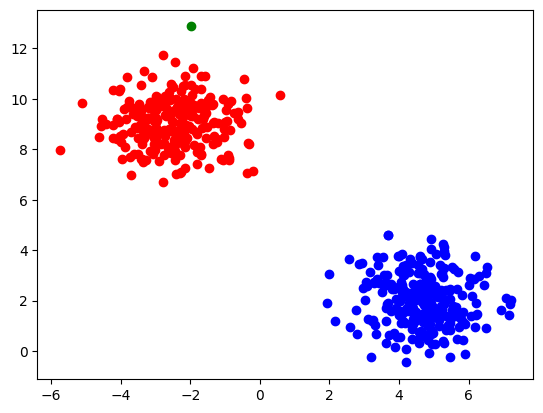

In [6]:
for key, value in model.results_dict.items():
    if value == 1:
        c = "r"
    elif value == -1:
        c = "g"
    else:
        c = "b"
    plt.scatter(key[0], key[1], c = c)

### Create test data: Non-globular

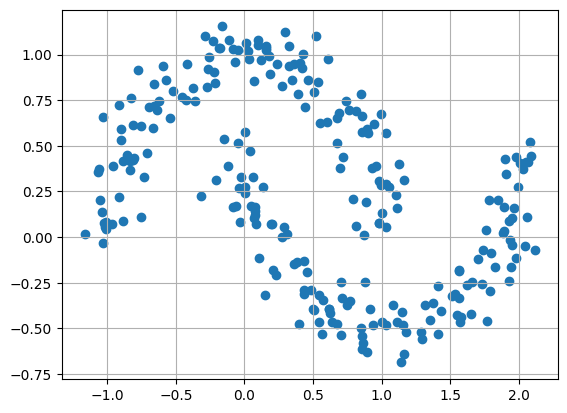

In [7]:
X, y = make_moons(n_samples = 250, noise = 0.10, random_state = 42)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1]);

### Instanitate model

In [8]:
model = DBSCAN(data = X)

### Find the best ```eps``` for various ```min_points``` values, i.e., $k$

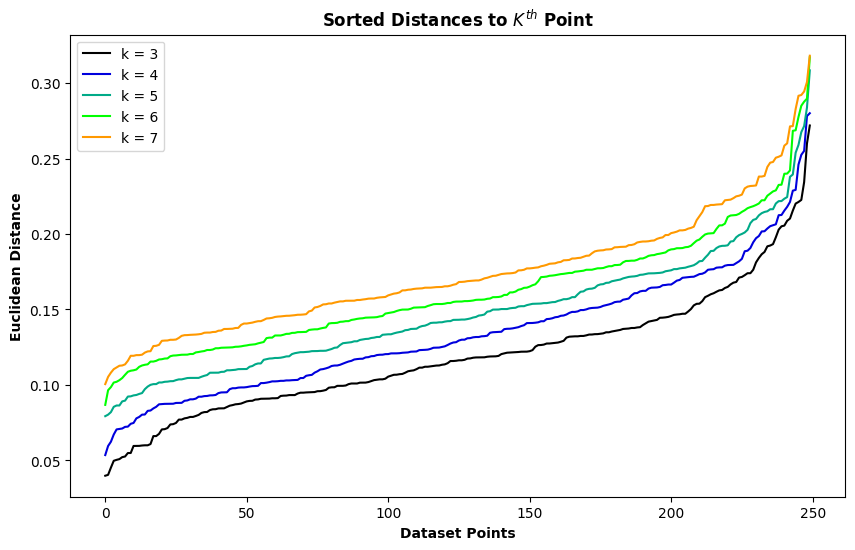

In [9]:
model.find_best_eps()

### Choose ```eps``` and ```min_points```; fit model

In [10]:
model.fit(eps = 0.2, min_points = 3)

### Plot results

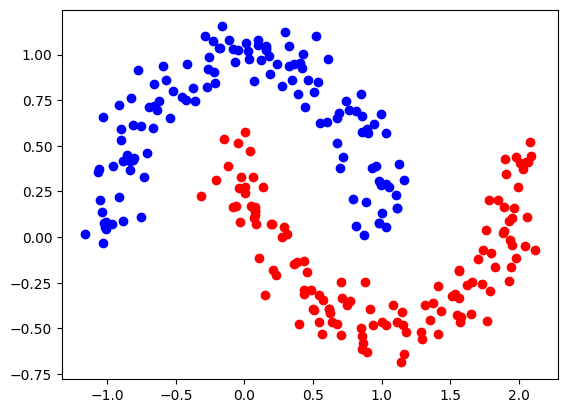

In [11]:
for key, value in model.results_dict.items():
    if value == 1:
        c = "r"
    elif value == -1:
        c = "g"
    else:
        c = "b"
    plt.scatter(key[0], key[1], c = c)

In [17]:
import pandas as pd  
import numpy as np

In [172]:
results_df = pd.DataFrame.from_dict(model.results_dict, orient = "index", columns = ["label"])
    

In [173]:
results_df = results_df.reset_index()

In [174]:
results_df

,index,label
0,"(-1.05254061, -0.10706418)",1
1,"(0.64303026, 0.76631)",1
2,"(1.23076192, -0.51041983)",2
3,"(0.0582444, 0.48880085)",2
4,"(0.02661272, 0.48901009)",2
...,...,...
147,"(0.93176969, 0.37896165)",1
148,"(0.05805704, -0.12442708)",2
149,"(0.6452335, -0.31417611)",2
150,"(0.6430302610847325, 0.7663099973546689)",1


In [175]:
results_df["point"] = results_df["index"].apply(lambda x: np.array(x))

In [176]:
results_df = results_df[["label", "point"]]

In [177]:
results_df

,label,point
0,1,"[-1.05254061, -0.10706418]"
1,1,"[0.64303026, 0.76631]"
2,2,"[1.23076192, -0.51041983]"
3,2,"[0.0582444, 0.48880085]"
4,2,"[0.02661272, 0.48901009]"
...,...,...
147,1,"[0.93176969, 0.37896165]"
148,2,"[0.05805704, -0.12442708]"
149,2,"[0.6452335, -0.31417611]"
150,1,"[0.6430302610847325, 0.7663099973546689]"


In [178]:
results_df = results_df[results_df["label"] == 1]
points_array = np.array(results_df["point"])
pair_wise_distances = np.empty((results_df.shape[0], results_df.shape[0]))
for i in range(pair_wise_distances.shape[0]):
    for j in range(pair_wise_distances.shape[1]):
        if i == j:
            pair_wise_distances[i, j] == 0
        else:
            distance = np.sqrt(np.sum((points_array[i] - points_array[j]) ** 2))
            pair_wise_distances[i, j] = distance

In [179]:
d = results_df.shape[1]
pair_wise_distances[pair_wise_distances != 0] = (1.0 / pair_wise_distances[pair_wise_distances != 0]) ** d
result = pair_wise_distances.sum(axis = 1)
result /= pair_wise_distances.shape[0] - 1
if result.sum() == 0:
    result = np.zeros(len(pair_wise_distances))
else:
    result **= (-1.0 / d)

/var/folders/jw/62ly49f15zj22rm_89qjsv940000gn/T/ipykernel_88101/1783515050.py:2: RuntimeWarning: overflow encountered in divide
  pair_wise_distances[pair_wise_distances != 0] = (1.0 / pair_wise_distances[pair_wise_distances != 0]) ** d


In [180]:
len(result)

76

In [181]:
len(points_array)

76

In [205]:
class Graph:
    def __init__(self):
        self.graph = {}
        self.edges = []
        self.internal_graph = {}
        self.internal_edges = []

    def add_node(self, node):
        if node not in self.graph:
            self.graph[node] = []

    def add_edge(self, node_1, node_2, weight):
        self.graph[node_1].append((node_2, weight))
        self.graph[node_2].append((node_1, weight))
        self.edges.append((weight, node_1, node_2))

    def set_internal_graph(self):
        added_edges = set()  # Track edges to avoid duplication
        for node, edges in self.graph.items():
            if len(edges) > 1:
                self.internal_graph[node] = edges
                for neighbor, weight in edges:
                    edge = frozenset({node, neighbor})
                    if edge not in added_edges:
                        self.internal_edges.append((weight, node, neighbor))
                        added_edges.add(edge)

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def union(self, parent, rank, x, y):
        root_x = self.find(parent, x)
        root_y = self.find(parent, y)

        if rank[root_x] < rank[root_y]:
            parent[root_x] = root_y
        elif rank[root_x] > rank[root_y]:
            parent[root_y] = root_x
        else:
            parent[root_y] = root_x
            rank[root_x] += 1

    def kruskal_mst(self):
        # Ensure internal edges are sorted by weight
        self.internal_edges.sort()

        parent = {}
        rank = {}

        # Initialize parent and rank for each node in the internal graph
        for node in self.internal_graph:
            parent[node] = node
            rank[node] = 0

        mst = []

        for edge in self.internal_edges:
            weight, node_1, node_2 = edge

            # Initialize parent and rank for node_1 and node_2 if not already done
            if node_1 not in parent:
                parent[node_1] = node_1
                rank[node_1] = 0

            if node_2 not in parent:
                parent[node_2] = node_2
                rank[node_2] = 0

            root_1 = self.find(parent, node_1)
            root_2 = self.find(parent, node_2)

            # If including this edge doesn't form a cycle
            if root_1 != root_2:
                mst.append(edge)
                self.union(parent, rank, root_1, root_2)

        self.mst = mst  # Store the MST for visualization or further use
        return mst  

In [206]:
# Assuming `Graph` is already defined as per previous code
graph = Graph()

# Add nodes to the graph
for point in points_array:
    graph.add_node(tuple(point))

# Add edges based on mutual reachability
for i in range(len(result)):
    for j in range(i + 1, len(result)):
        if i != j:
            # Compute Euclidean distance between points
            distance = np.sqrt(np.sum((result[i] - result[j]) ** 2))
            
            # Calculate mutual reachability distance
            mutual_reachability = max(result[i], result[j], distance)
            
            # Add edge to the graph with mutual reachability as the weight
            graph.add_edge(tuple(points_array[i]), tuple(points_array[j]), mutual_reachability)

graph.set_internal_graph()
graph.kruskal_mst()

[(9.646264582581316e-100,
  (-1.05254061, -0.10706418),
  (0.05374428, 0.83553907)),
 (1.6767985493960946e-75,
  (-1.05254061, -0.10706418),
  (0.37267013, 0.97023994)),
 (5.503269779437122e-75, (-1.05254061, -0.10706418), (-1.04347347, 0.211073)),
 (7.187183742352117e-60, (-1.05254061, -0.10706418), (-1.05186376, 0.5234254)),
 (1.0746650002244079e-55,
  (-1.05254061, -0.10706418),
  (-0.26816562, 0.91195913)),
 (3.575272233424453e-55,
  (-1.05254061, -0.10706418),
  (-0.82920928, 0.59268025)),
 (1.9278794218925377e-51,
  (-1.05254061, -0.10706418),
  (-0.59242388, 0.80792298)),
 (2.4760485181265253e-08, (-1.05254061, -0.10706418), (0.64303026, 0.76631)),
 (2.4760485181265256e-08,
  (-1.05254061, -0.10706418),
  (0.6430302610847325, 0.7663099973546689)),
 (0.13265852960933952, (-1.05254061, -0.10706418), (0.56093461, 0.7887288)),
 (0.14115503212466374, (-1.05254061, -0.10706418), (0.93003623, 0.28657332)),
 (0.14147711677840671, (-1.05254061, -0.10706418), (0.91908967, 0.27273789)),
 (

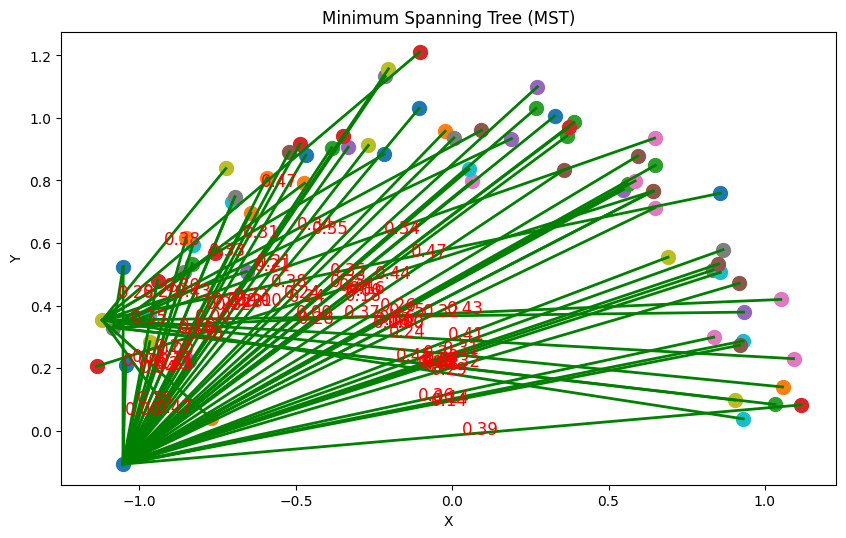

In [207]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))

# Draw all points (nodes)
for node in graph.internal_graph.keys():
    plt.scatter(*node, s=100)  # *node unpacks the tuple into x and y coordinates

# Draw MST edges
for edge in graph.mst:
    weight, node_1, node_2 = edge
    x_values = [node_1[0], node_2[0]]
    y_values = [node_1[1], node_2[1]]
    plt.plot(x_values, y_values, 'g-', lw=2)  # 'g-' means green line, lw=2 sets the line width

    # Optionally, you can display the weight of the edge
    mid_x = (node_1[0] + node_2[0]) / 2
    mid_y = (node_1[1] + node_2[1]) / 2
    plt.text(mid_x, mid_y, f'{weight:.2f}', color='red', fontsize=12)

# Set titles and labels
plt.title("Minimum Spanning Tree (MST)")
plt.xlabel("X")
plt.ylabel("Y")

# Set equal scaling
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()


 


Minimum Spanning Tree: [(1, (1, 2), (2, 3)), (2, (2, 3), (3, 4)), (3, (3, 4), (4, 5))]


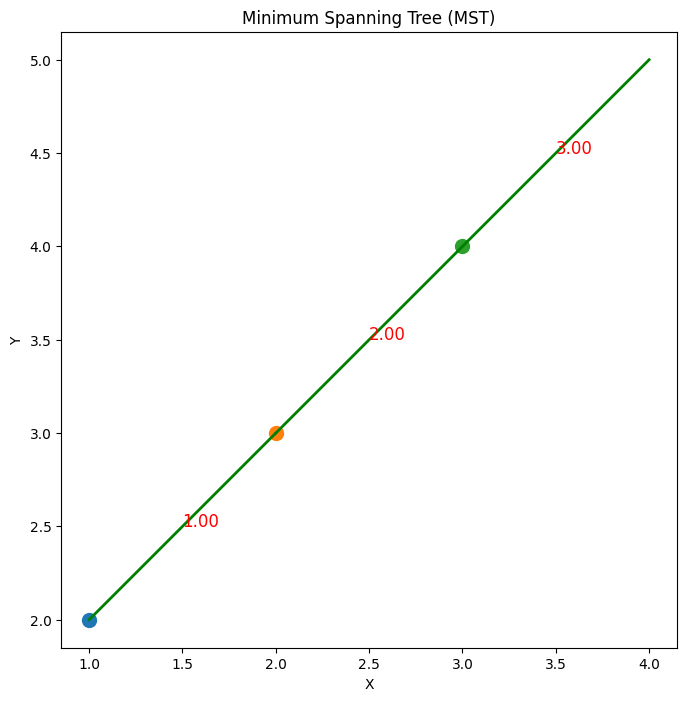

In [204]:
class Graph:
    def __init__(self):
        self.graph = {}
        self.edges = []
        self.internal_graph = {}
        self.internal_edges = []

    def add_node(self, node):
        if node not in self.graph:
            self.graph[node] = []

    def add_edge(self, node_1, node_2, weight):
        self.graph[node_1].append((node_2, weight))
        self.graph[node_2].append((node_1, weight))
        self.edges.append((weight, node_1, node_2))

    def set_internal_graph(self):
        added_edges = set()  # Track edges to avoid duplication
        for node, edges in self.graph.items():
            if len(edges) > 1:
                self.internal_graph[node] = edges
                for neighbor, weight in edges:
                    edge = frozenset({node, neighbor})
                    if edge not in added_edges:
                        self.internal_edges.append((weight, node, neighbor))
                        added_edges.add(edge)

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def union(self, parent, rank, x, y):
        root_x = self.find(parent, x)
        root_y = self.find(parent, y)

        if rank[root_x] < rank[root_y]:
            parent[root_x] = root_y
        elif rank[root_x] > rank[root_y]:
            parent[root_y] = root_x
        else:
            parent[root_y] = root_x
            rank[root_x] += 1

    def kruskal_mst(self):
        # Ensure internal edges are sorted by weight
        self.internal_edges.sort()

        parent = {}
        rank = {}

        # Initialize parent and rank for each node in the internal graph
        for node in self.internal_graph:
            parent[node] = node
            rank[node] = 0

        mst = []

        for edge in self.internal_edges:
            weight, node_1, node_2 = edge

            # Initialize parent and rank for node_1 and node_2 if not already done
            if node_1 not in parent:
                parent[node_1] = node_1
                rank[node_1] = 0

            if node_2 not in parent:
                parent[node_2] = node_2
                rank[node_2] = 0

            root_1 = self.find(parent, node_1)
            root_2 = self.find(parent, node_2)

            # If including this edge doesn't form a cycle
            if root_1 != root_2:
                mst.append(edge)
                self.union(parent, rank, root_1, root_2)

        self.mst = mst  # Store the MST for visualization or further use
        return mst


# Example usage:
def main():
    graph = Graph()

    # Example points as tuple nodes
    point_a = (1, 2)
    point_b = (2, 3)
    point_c = (3, 4)
    point_d = (4, 5)

    graph.add_node(point_a)
    graph.add_node(point_b)
    graph.add_node(point_c)
    graph.add_node(point_d)

    graph.add_edge(point_a, point_b, 1)
    graph.add_edge(point_b, point_c, 2)
    graph.add_edge(point_c, point_d, 3)
    graph.add_edge(point_a, point_c, 4)

    graph.set_internal_graph()
    mst = graph.kruskal_mst()

    print("Minimum Spanning Tree:", mst)

    plt.figure(figsize=(10, 8))

    # Draw all points (nodes)
    for node in graph.internal_graph.keys():
        plt.scatter(*node, s=100)  # *node unpacks the tuple into x and y coordinates

    # Draw MST edges
    for edge in graph.mst:
        weight, node_1, node_2 = edge
        x_values = [node_1[0], node_2[0]]
        y_values = [node_1[1], node_2[1]]
        plt.plot(x_values, y_values, 'g-', lw=2)  # 'g-' means green line, lw=2 sets the line width

        # Optionally, you can display the weight of the edge
        mid_x = (node_1[0] + node_2[0]) / 2
        mid_y = (node_1[1] + node_2[1]) / 2
        plt.text(mid_x, mid_y, f'{weight:.2f}', color='red', fontsize=12)

    # Set titles and labels
    plt.title("Minimum Spanning Tree (MST)")
    plt.xlabel("X")
    plt.ylabel("Y")

    # Set equal scaling
    plt.gca().set_aspect('equal', adjustable='box')

    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()
